# Credit Card Default Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import logging

In [3]:
logging.basicConfig(level = logging.INFO,
                    filename = "credit_logging.log",
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    datefmt = '%Y-%m-%d %H-%M-%S')

In [4]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
logging.info('Dataset loaded')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Description of variables

+ ID: ID of each client
+ LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
+ SEX: Gender (1=male, 2=female)
+ EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
+ MARRIAGE: Marital status (1=married, 2=single, 3=others)
+ AGE: Age in years
+ PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
+ PAY_2: Repayment status in August, 2005 (scale same as above)
+ PAY_3: Repayment status in July, 2005 (scale same as above)
+ PAY_4: Repayment status in June, 2005 (scale same as above)
+ PAY_5: Repayment status in May, 2005 (scale same as above)
+ PAY_6: Repayment status in April, 2005 (scale same as above)
+ BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
+ BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
+ BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
+ BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
+ BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
+ BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
+ PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
+ PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
+ PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
+ PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
+ PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
+ PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
+ default.payment.next.month: Default payment (1=yes, 0=no)

# Data Exploration

In [8]:
# Checking for 30000 unique IDs
df["ID"].nunique()

30000

In [9]:
# Checking for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
# Renaming column
df.rename(columns = {"default.payment.next.month" : "defaulter"}, inplace = True)

In [11]:
logging.info('Renamed the target column')

In [12]:
def plot_categorical(cat_col):
    
    
    plt.title('Count of {0} variable'.format(cat_col))
    sns.countplot(data = df, x = cat_col)
    plt.show()

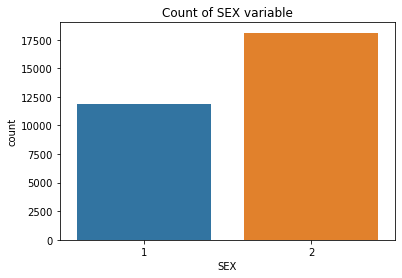

In [13]:
plot_categorical("SEX")

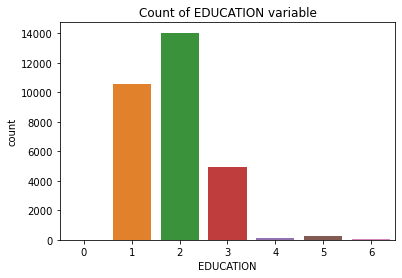

In [14]:
plot_categorical("EDUCATION")

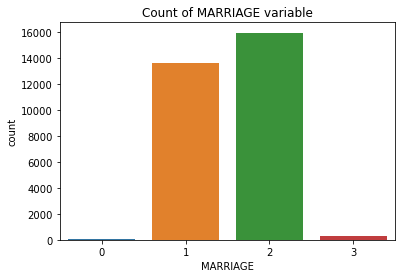

In [15]:
plot_categorical("MARRIAGE")

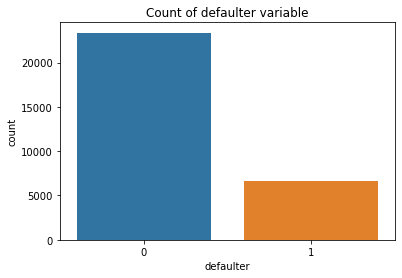

In [16]:
plot_categorical("defaulter")

In [17]:
df["defaulter"].value_counts()

0    23364
1     6636
Name: defaulter, dtype: int64

In [18]:
cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].nunique()<12:
        cat_cols.append(col)
    else:
        num_cols.append(col)
    
print("Categorical Columns Are : ", cat_cols)
print("Numerical Columns Are : ", num_cols)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'defaulter']
Numerical Columns Are :  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [19]:
num_cols.remove("ID")
cat_cols.remove("defaulter")

print("Categorical Columns Are : ", cat_cols)
print("Numerical Columns Are : ", num_cols)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


Combining education categories 5,6 and 0 and adding them to the category 4

In [20]:
edu_combine = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[edu_combine, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [21]:
logging.info("Unnamed Education categories combined")

Adding marriage category 0 to category 3

In [22]:
mar_combine = (df['MARRIAGE'] == 0) 
df.loc[mar_combine, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [23]:
logging.info("Unnamed Marriage category combined")

### Relation of categorical variables with the target variable

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

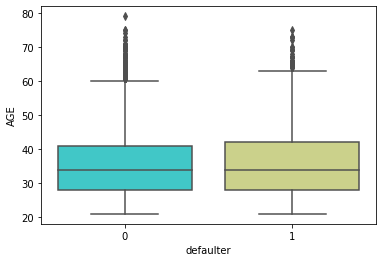

In [24]:
sns.boxplot(x='defaulter',y='AGE',data=df,palette='rainbow')

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

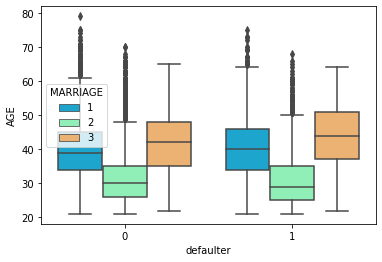

In [25]:
sns.boxplot(x='defaulter',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

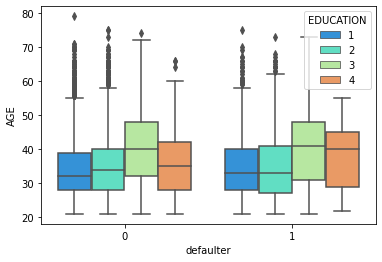

In [26]:
sns.boxplot(x='defaulter',hue='EDUCATION', y='AGE',data=df,palette="rainbow")

<AxesSubplot:xlabel='defaulter', ylabel='LIMIT_BAL'>

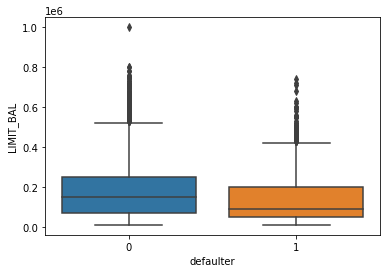

In [27]:
sns.boxplot(x="defaulter", y="LIMIT_BAL", data= df)

<Figure size 432x432 with 0 Axes>

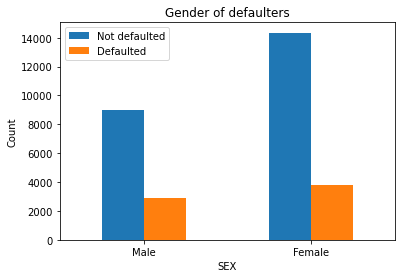

In [28]:
target_count = df.groupby(['SEX','defaulter']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Gender of defaulters")
plt.show()

In [29]:
df.groupby("defaulter")["SEX"].value_counts(ascending=True)

defaulter  SEX
0          1       9015
           2      14349
1          1       2873
           2       3763
Name: SEX, dtype: int64

Females are more likely to default than the males

In [30]:
def plot_relation(cat_col):
    plt.title('{0} vs Probability of defaulting'.format(cat_col))
    df.groupby(cat_col)['defaulter'].mean().plot.bar()
    plt.show()

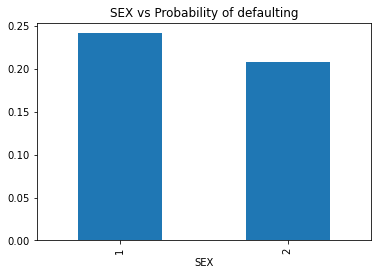

In [31]:
plot_relation("SEX")

Males are more likely to deafult on their credit card

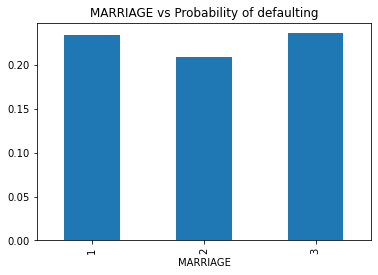

In [32]:
plot_relation("MARRIAGE")

Married people are more likely to deafult on their credit card

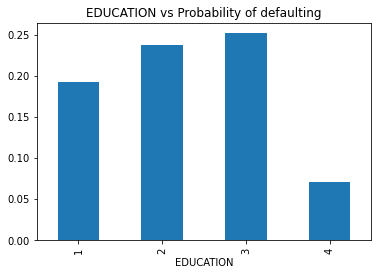

In [33]:
plot_relation("EDUCATION")

High school students are more likely to deafult on their credit card

In [34]:
# Renmaing to keep the naming conventions the same across all variables where PAY_1 stands for Sepetember
df.rename(columns = {"PAY_0":"PAY_1"}, inplace = True)

In [35]:
# Feature engineering
# Creating columns from existing data to gain insight

df['total_bill_amt'] = df.loc[: , ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)

df['total_pay_amt'] = df.loc[:,['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1)

df['total_due_amt'] = df['total_bill_amt']  - df['total_pay_amt']

In [36]:
logging.info("Created three new columns for exploring data")

In [37]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter,total_bill_amt,total_pay_amt,total_due_amt
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,7015.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,12077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,90635.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,222946.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,50290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,725349.0,42550.0,682799.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,21182.0,14490.0,6692.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,70496.0,31300.0,39196.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,266611.0,147181.0,119430.0


In [38]:
# Dropping these columns as they were for exploratory purposes
df = df.drop(columns= ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'total_due_amt'])

In [39]:
logging.info("Dropping the original columns")

# Correlation

In [40]:
correlation = df.corr()

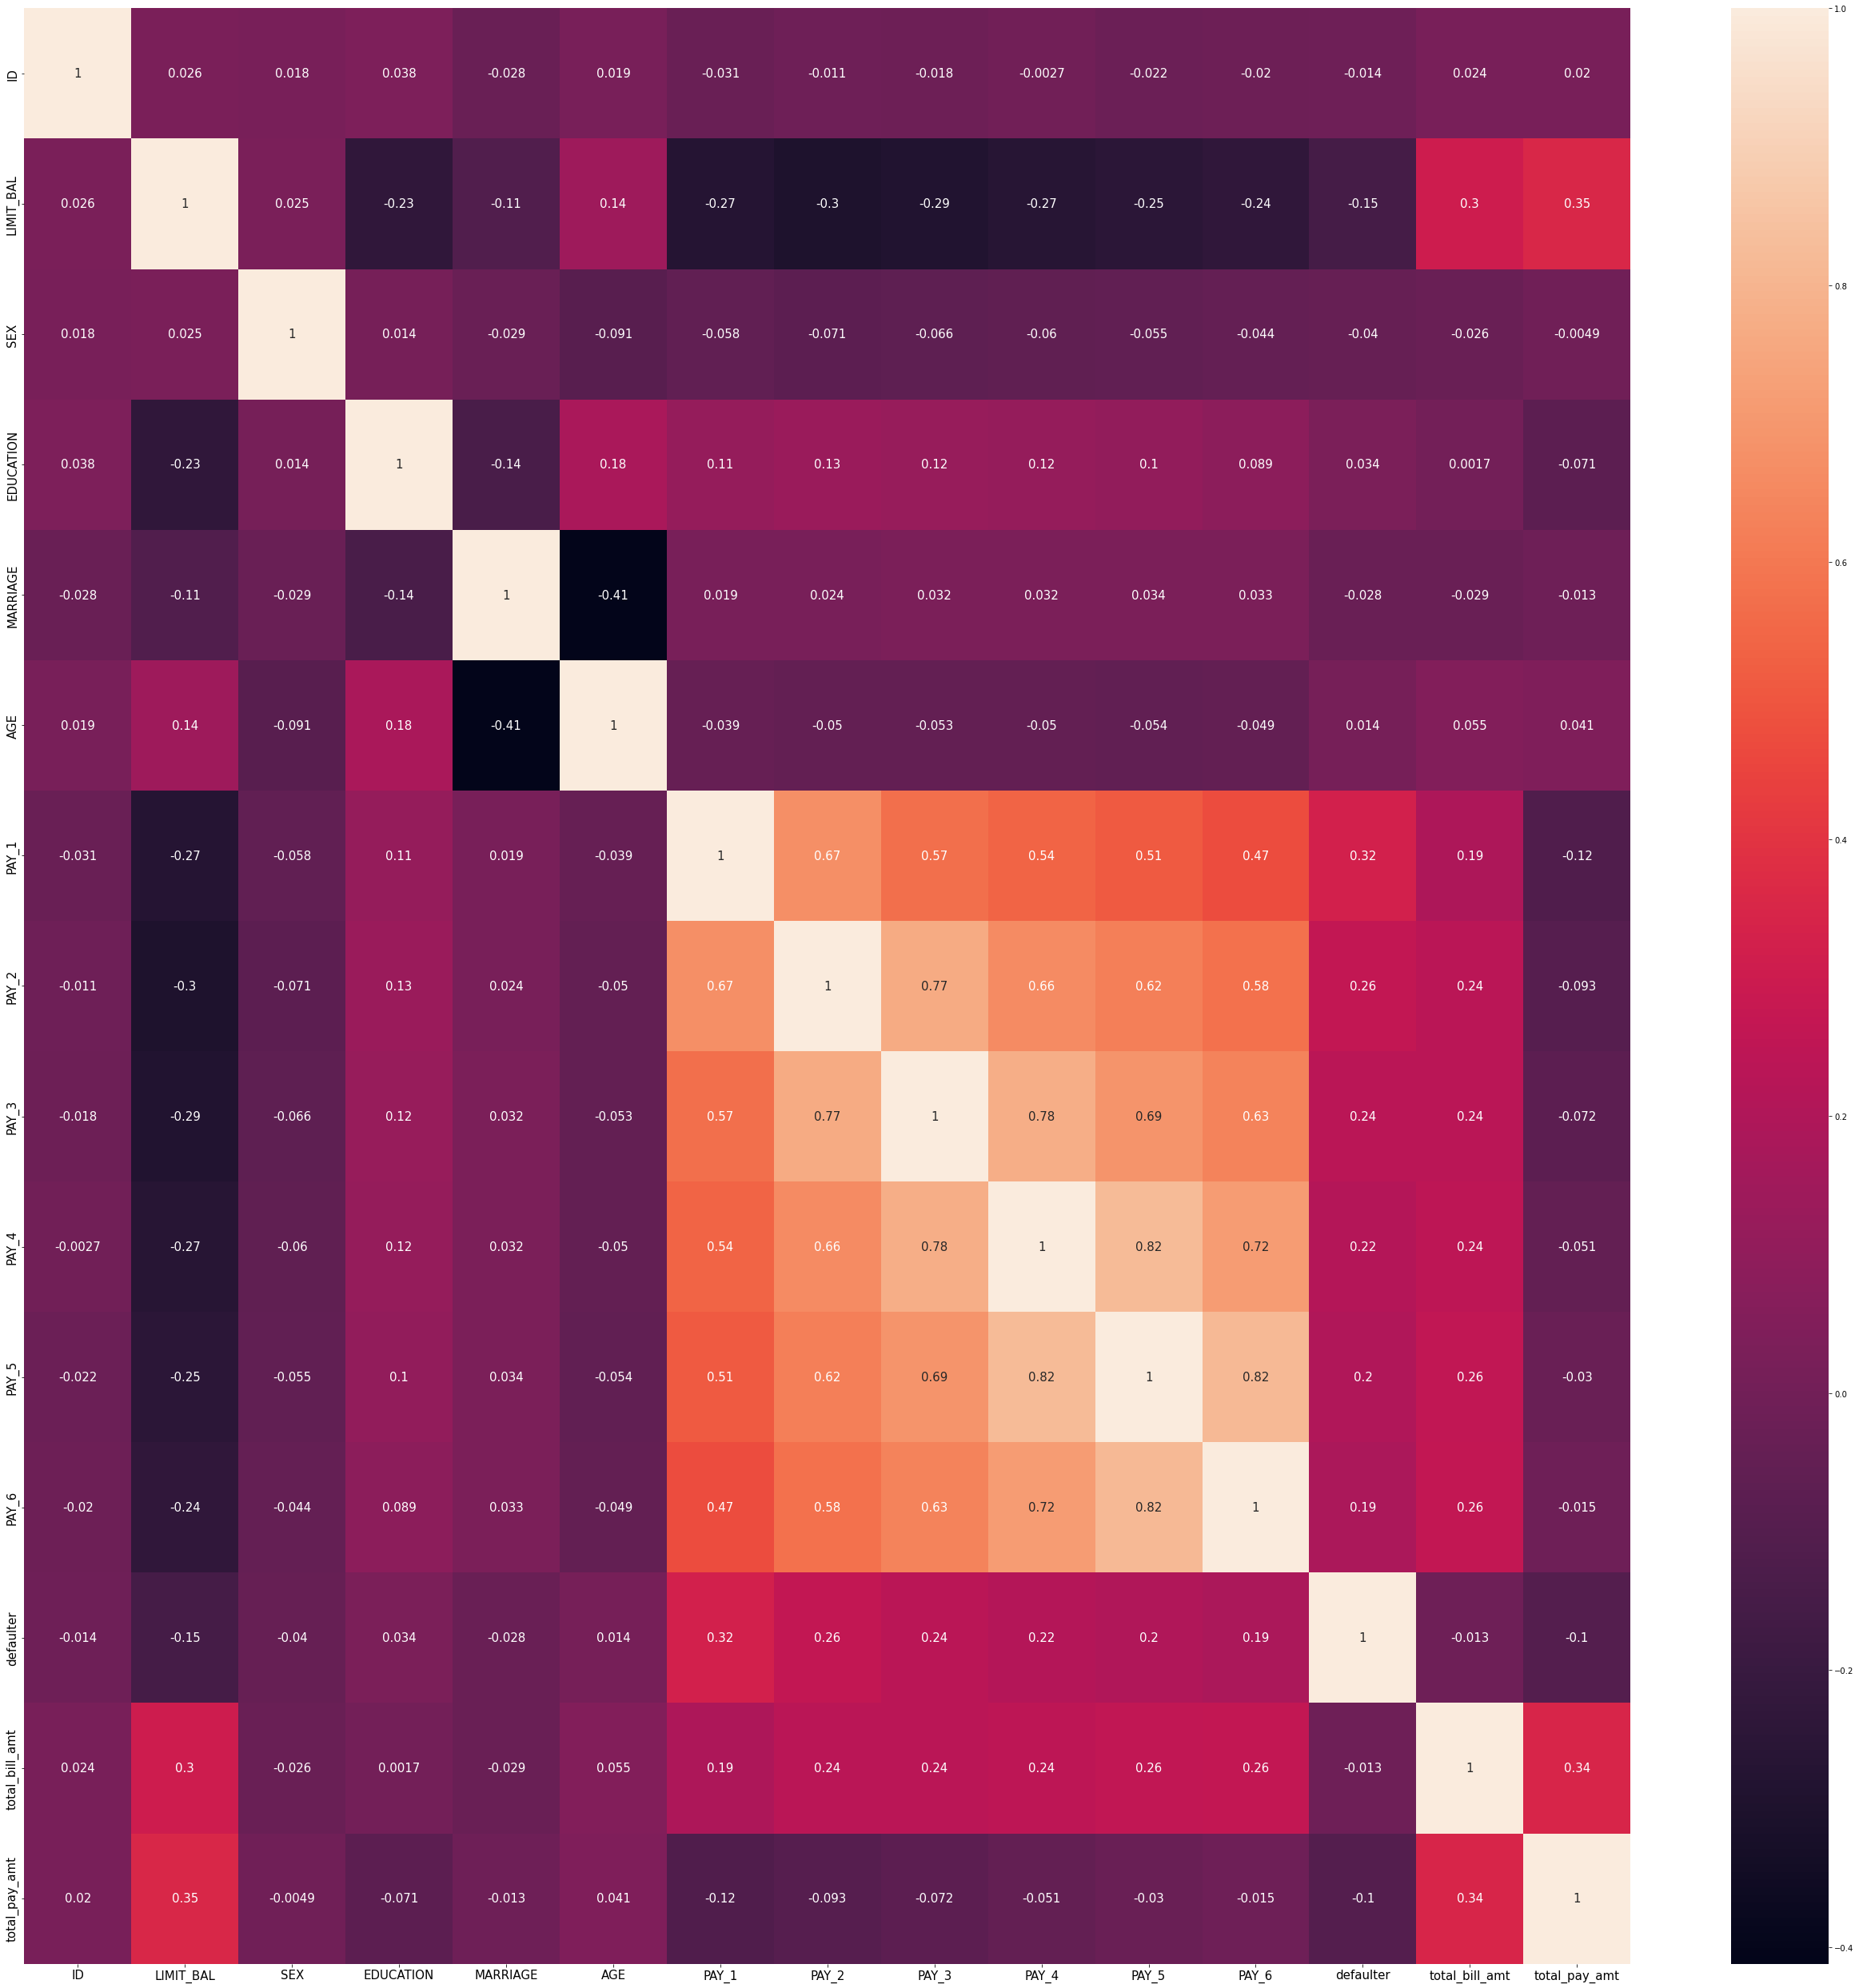

In [41]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 15}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Classification

In [42]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [43]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['defaulter']
X = df.drop(columns=['ID', 'defaulter'])
print(X.shape)
print(y.shape)

(30000, 13)
(30000,)


### Train-test split

In [44]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 13)
(24000,)
(6000, 13)
(6000,)


In [45]:
X_test.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill_amt,total_pay_amt
2308,30000.0,1,2,2,25,0,0,0,0,0,0,71631.0,10000.0
22404,150000.0,2,1,2,26,0,0,0,0,0,0,635657.0,19867.0
23397,70000.0,2,3,1,32,0,0,0,0,0,0,417808.0,16035.0
25058,130000.0,1,3,2,49,0,0,0,0,0,-1,90884.0,21878.0
2664,50000.0,2,2,2,36,0,0,0,0,0,2,243532.0,7300.0
8511,50000.0,2,2,2,29,-1,-1,-1,0,0,0,33618.0,13263.0
5148,110000.0,1,3,2,33,1,2,0,0,0,-2,14230.0,1000.0
7790,140000.0,2,1,1,32,1,-2,-2,-2,-2,-2,0.0,0.0
11311,260000.0,2,2,3,38,-1,-1,-1,-1,-1,0,74449.0,50795.0
19043,80000.0,2,2,2,23,0,0,-2,-2,-2,-2,68850.0,0.0


In [46]:
y_test.head(20)

2308     0
22404    0
23397    0
25058    0
2664     1
8511     0
5148     1
7790     0
11311    0
19043    0
10784    0
22246    0
3268     0
15947    1
14977    0
14474    0
28694    0
14054    0
26545    0
14980    1
Name: defaulter, dtype: int64

In [47]:
logging.info("Split data into train and test")

In [48]:
# Create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [49]:
# The data is imbalanced for defaulters and non defaulters
df_majority = df_train[df_train.defaulter == 0]
df_minority = df_train[df_train.defaulter == 1]

print("Majority class count", df_majority.defaulter.count())
print("Minority class count", df_minority.defaulter.count())

Majority class count 18677
Minority class count 5323


# SMOTE for data imbalance

In [50]:
# Using SMOTE to adjust the imbalance in data
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(y_SMOTE.value_counts())

0    18677
1    18677
Name: defaulter, dtype: int64


In [51]:
logging.info("Performed SMOTE to overcome data imbalance")

In [52]:
X_SMOTE

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,total_bill_amt,total_pay_amt
0,80000.000000,2,2,2,24,0,0,0,0,0,0,383630.000000,14137.000000
1,30000.000000,1,2,2,28,0,0,0,0,0,0,135160.000000,8056.000000
2,180000.000000,2,4,1,44,0,0,-1,-1,-1,-1,38987.000000,18253.000000
3,60000.000000,1,1,2,25,0,0,0,0,0,0,269005.000000,11318.000000
4,130000.000000,2,2,2,25,0,0,0,0,0,0,701250.000000,34000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37349,200000.000000,1,1,1,31,-1,-1,-1,-1,-1,-1,513270.847839,222435.474921
37350,20000.000000,1,1,1,24,-1,-1,-1,-1,-1,-1,2685.082036,2360.310588
37351,301117.905847,1,1,1,30,-2,-2,-2,-2,-2,-2,15651.873734,14446.035544
37352,30000.000000,2,3,2,23,0,0,0,0,0,0,92044.244325,4305.078498


### Creating a pipeline for machine learning classification

In [53]:
from sklearn.pipeline import Pipeline
# for feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
pipeline_rf=Pipeline([('scalar1',scaler),
                     ('rf_classifier',RandomForestClassifier(n_estimators=1000, random_state= 123))])

In [55]:
pipeline_lr=Pipeline([('scalar2',scaler),
                     ('lr_classifier',LogisticRegression(random_state= 123))])

In [56]:
pipeline_dt=Pipeline([('scalar3',scaler),
                     ('dt_classifier',DecisionTreeClassifier(max_depth = 3, max_features=4, criterion='gini', random_state= 123))])

In [57]:
pipeline_svc=Pipeline([('scalar5',scaler),
                     ('svc_classifier',SVC(random_state= 123))])

In [58]:
pipeline_adb=Pipeline([('scalar6',scaler),
                     ('adb_classifier',AdaBoostClassifier(random_state= 123))])

In [59]:
pipelines = [pipeline_rf, pipeline_lr, pipeline_dt, pipeline_svc, pipeline_adb]

In [60]:
logging.info("Created pipelines for all models")

In [61]:
# Dictionary of pipelines and classifier types for ease of reference

pipe_dict = {0: 'RandomForest', 1: 'Logistic Regression', 2: 'Decision Tree', 3: 'SVC', 4: 'ADB'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_SMOTE, y_SMOTE)

In [62]:
logging.info("Fitted the models on the training data")

In [63]:
# Making predictions with all models
rf_pred = pipeline_rf.predict(X_test)
lr_pred = pipeline_lr.predict(X_test)
dt_pred = pipeline_dt.predict(X_test)
svc_pred = pipeline_svc.predict(X_test)
adb_pred = pipeline_adb.predict(X_test)

In [64]:
logging.info("Made predictions on test data with all models")

### Random Forest

In [65]:
print('Accuracy', accuracy_score(rf_pred,y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(rf_pred,y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(rf_pred,y_test))

Accuracy 0.7701666666666667
-----------------------------------------
Confusion Matrix
[[3968  660]
 [ 719  653]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4628
           1       0.50      0.48      0.49      1372

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000



### Logistic Regression

In [66]:
print('Accuracy', accuracy_score(lr_pred,y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(lr_pred,y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(lr_pred,y_test))

Accuracy 0.6831666666666667
-----------------------------------------
Confusion Matrix
[[3344  558]
 [1343  755]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      3902
           1       0.58      0.36      0.44      2098

    accuracy                           0.68      6000
   macro avg       0.64      0.61      0.61      6000
weighted avg       0.67      0.68      0.66      6000



### Decision tree

In [67]:
print('Accuracy', accuracy_score(dt_pred,y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(dt_pred,y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(dt_pred,y_test))

Accuracy 0.6936666666666667
-----------------------------------------
Confusion Matrix
[[3469  620]
 [1218  693]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4089
           1       0.53      0.36      0.43      1911

    accuracy                           0.69      6000
   macro avg       0.63      0.61      0.61      6000
weighted avg       0.67      0.69      0.68      6000



### SVC

In [68]:
print('Accuracy', accuracy_score(svc_pred,y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(svc_pred,y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(svc_pred,y_test))

Accuracy 0.7483333333333333
-----------------------------------------
Confusion Matrix
[[3763  586]
 [ 924  727]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4349
           1       0.55      0.44      0.49      1651

    accuracy                           0.75      6000
   macro avg       0.68      0.65      0.66      6000
weighted avg       0.73      0.75      0.74      6000



### Ada Boost

In [69]:
print('Accuracy', accuracy_score(adb_pred,y_test))
print('-----------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(adb_pred,y_test))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(adb_pred,y_test))

Accuracy 0.7335
-----------------------------------------
Confusion Matrix
[[3634  546]
 [1053  767]]
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4180
           1       0.58      0.42      0.49      1820

    accuracy                           0.73      6000
   macro avg       0.68      0.65      0.65      6000
weighted avg       0.72      0.73      0.72      6000



### Feature importance

In [70]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': pipeline_rf['rf_classifier'].feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

In [71]:
feature_importances

,index,features,importance
0,1,SEX,0.034558
1,9,PAY_5,0.035024
2,10,PAY_6,0.036133
3,3,MARRIAGE,0.036232
4,2,EDUCATION,0.039831
5,8,PAY_4,0.044954
6,7,PAY_3,0.048728
7,6,PAY_2,0.071876
8,5,PAY_1,0.089751
9,4,AGE,0.112431


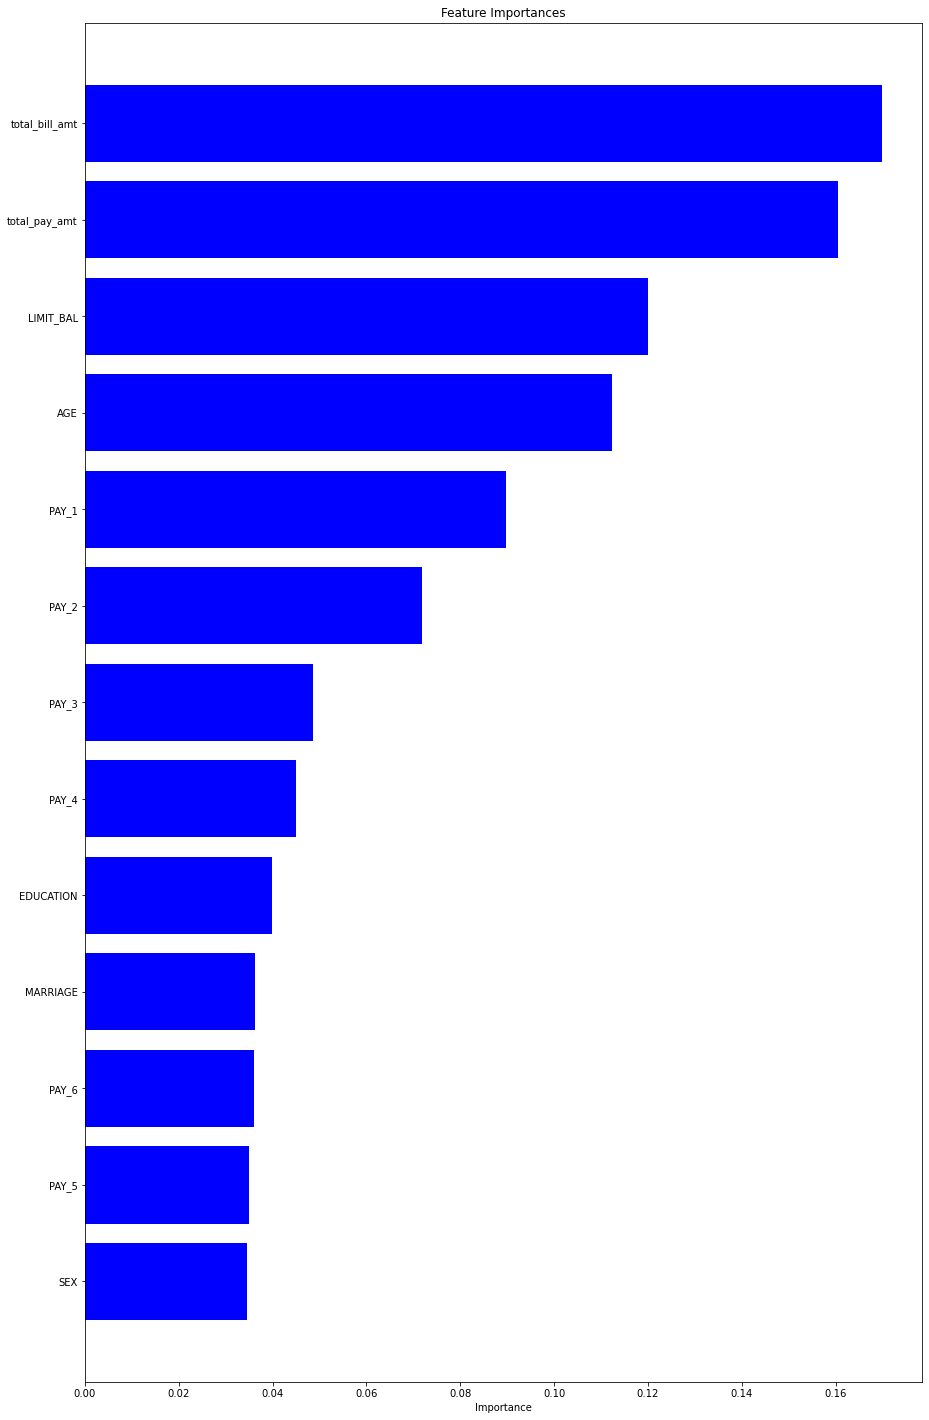

In [72]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [73]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Accuracy of all models

In [74]:
# Accuracy of random forest model
rf_model_acc = accuracy_score(rf_pred,y_test)*100
# Accuracy of logistic regression model
log_model_acc = accuracy_score(lr_pred,y_test)*100

# Accuracy of decision tree model
dt_model_acc = accuracy_score(dt_pred,y_test)*100

# Accuracy of svm model
svc_model_acc = accuracy_score(svc_pred,y_test)*100

# Accuracy of adb model
adb_model_acc = accuracy_score(adb_pred,y_test)*100

In [75]:
# Creating a dataframe of the models and its accuracy for plotting
model_data = {'Model':['Random Forest', 'Logistic regression', 'Decision tree', 'SVM', 'ADB'],
        'Accuracy':[rf_model_acc, log_model_acc, dt_model_acc, svc_model_acc, adb_model_acc]}
 
# Create DataFrame
model_df = pd.DataFrame(model_data)
model_df

,Model,Accuracy
0,Random Forest,77.016667
1,Logistic regression,68.316667
2,Decision tree,69.366667
3,SVM,74.833333
4,ADB,73.350000


In [76]:
# sorting the accuracy in ascending order
model_df_sorted= model_df.sort_values('Accuracy')

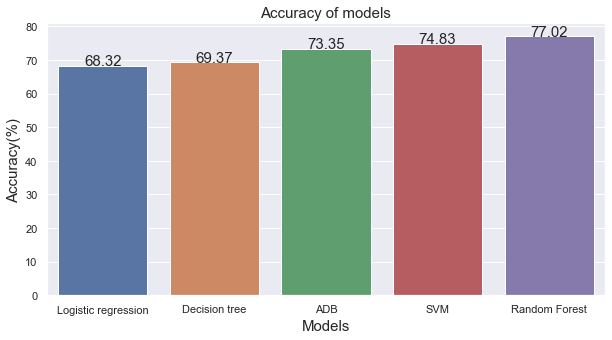

In [77]:
# Plotting a bar chart to show the performnce of each model
sns.set(rc={'figure.figsize':(10,5)})

bar_plots = sns.barplot(x= "Model", y= "Accuracy", data = model_df_sorted)
 
for bar in bar_plots.patches:
    bar_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va ='center',
                   size=15,  xytext=(0, 4),
                   textcoords='offset points')

# Names for the x axis, y axis and the title
plt.xlabel("Models", size =15)
plt.ylabel("Accuracy(%)", size=15)
plt.title("Accuracy of models", size = 15)
plt.show()

In [78]:
logging.info("Ran all models and found model with best accuracy")

# Saving the best model

In [79]:
import pickle

In [80]:
pickle.dump(pipeline_rf['rf_classifier'], open('rf_model.pkl', 'wb'))